In [47]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Visualization import *
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from util.plotting import *
from src.sampling.Sampling import sampling_sndl

## Erdos-Renyi
### Load ER

In [45]:
def ER(ntwk, save_path='data/ER_{ntwk}.txt'):
    save_path = save_path.format(ntwk=ntwk)
    G = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G.add_edge(e[0], e[1])

    n = len(G.nodes())
    p = nx.density(G)

    G_er = nx.erdos_renyi_graph(n=n,p=p)
    nx.write_edgelist(G_er, save_path, data=False)

In [46]:
# Example Usage
ER('Caltech36')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 143, 7]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 143
num of subgraphs induced on k-paths: 7
initial loading beta [[ 0.07975782  0.79607907 -0.6891448  -0.60701025  0.26323568 -0.07400649
  -0.97742641  0.85104943  0.17024884  0.73570066 -0.81924153  0.1489427
  -0.01407636 -0.27897398 -0.33802133 -0.66136289 -0.92507627]
 [ 0.25389295 -0.63689471 -0.43249127 -0.53269976  0.88235538  0.57574478
   0.2524222   0.7587843  -0.66980328 -0.62110639 -0.85847252 -0.04914773
   0.89997897 -0.42996422  0.69834767  0.7771636   0.06141875]]


100%|██████████| 100/100 [00:01<00:00, 72.21it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[322,  28],
       [ 14, 136]], dtype=int64), 0.916]


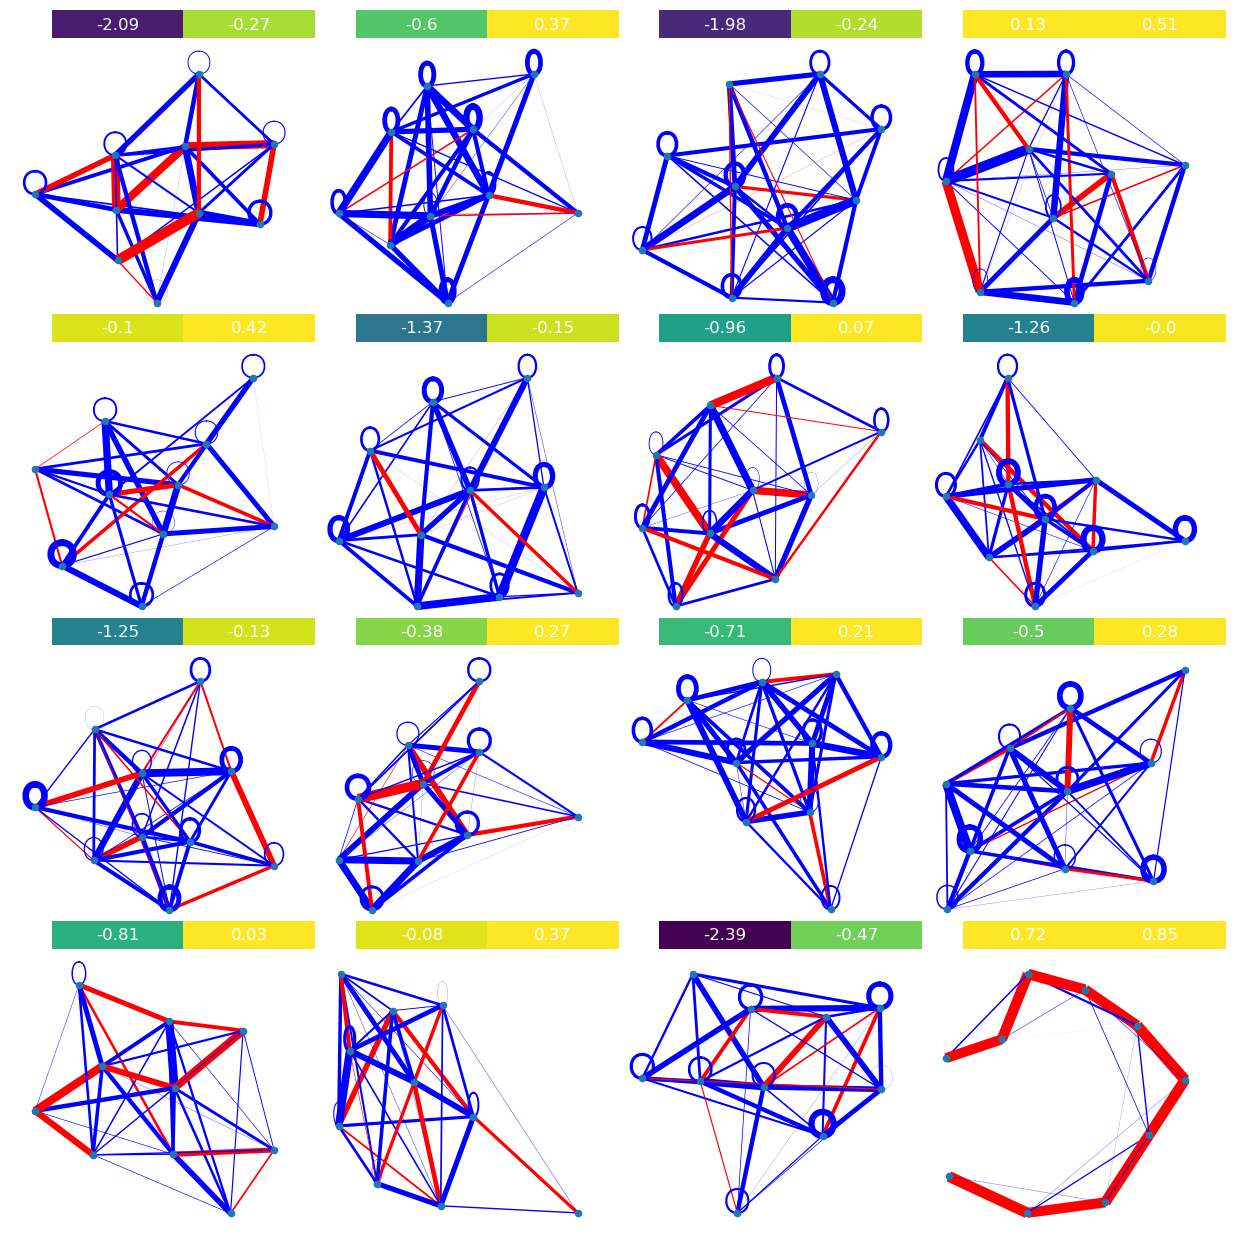

In [27]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'ER_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter=100, subsample_number=100,
                            if_validate=False, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_ER^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

### Load WS

In [43]:
def WS(ntwk, p=0.1, random_orientation=False, save_path='data/WS_{ntwk}.txt'):
    # Watts-Strogatz model with baseline graph G and edge rewiring probability p 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    # For each oriented edge, resample the head node uniformly at random with probability p, independently. 
    # Do nothing for that edge with probability 1-p. 
    
    save_path = save_path.format(ntwk=ntwk)

    G = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G.add_edge(e[0], e[1])

    # Give random orientation by crea
    if random_orientation: 
        G1 = random_orientation(G)
    else: #G is already a digraph 
        G1 = G

    nodes = list(G1.nodes())
    G_ws = nx.Graph()
    
    for e in G1.edges():
        U = np.random.rand()
        if U < p: 
            i = np.random.choice(np.arange(len(nodes)))
            v = nodes[i]
            G_ws.add_edge(e[0],v)
        else: 
            G_ws.add_edge(e[0],e[1])

    nx.write_edgelist(G_ws, save_path, data=False)

In [44]:
# Example Usage
WS('Caltech36')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 153, 8]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 153
num of subgraphs induced on k-paths: 8
initial loading beta [[-0.76765108 -0.25488832  0.38169142  0.0069638  -0.18793544  0.07117773
  -0.49358693  0.49208113  0.9280075   0.40927029  0.81235173  0.90649568
   0.00697486 -0.47680536  0.37637433  0.05974824  0.84404962]
 [-0.94672414 -0.23228242 -0.16560892 -0.28321966 -0.33006424  0.06682234
  -0.97398953 -0.06028213  0.86302048 -0.75817359 -0.63437906  0.4811705
   0.80962509 -0.93033969 -0.06880083 -0.10020771  0.04340135]]


  9%|▉         | 9/100 [00:00<00:01, 78.53it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[337,  24],
       [ 15, 146]], dtype=int64), 0.925]


 17%|█▋        | 17/100 [00:00<00:01, 78.63it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 15, 146]], dtype=int64), 0.923]


 33%|███▎      | 33/100 [00:00<00:00, 68.90it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 13, 148]], dtype=int64), 0.927]


 41%|████      | 41/100 [00:00<00:00, 70.01it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 13, 148]], dtype=int64), 0.927]


 49%|████▉     | 49/100 [00:00<00:00, 69.55it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 13, 148]], dtype=int64), 0.927]


 57%|█████▋    | 57/100 [00:00<00:00, 72.06it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 13, 148]], dtype=int64), 0.927]


 73%|███████▎  | 73/100 [00:01<00:00, 65.84it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 13, 148]], dtype=int64), 0.927]


 87%|████████▋ | 87/100 [00:01<00:00, 61.29it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 13, 148]], dtype=int64), 0.927]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 13, 148]], dtype=int64), 0.927]


100%|██████████| 100/100 [00:01<00:00, 67.65it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[336,  25],
       [ 13, 148]], dtype=int64), 0.927]


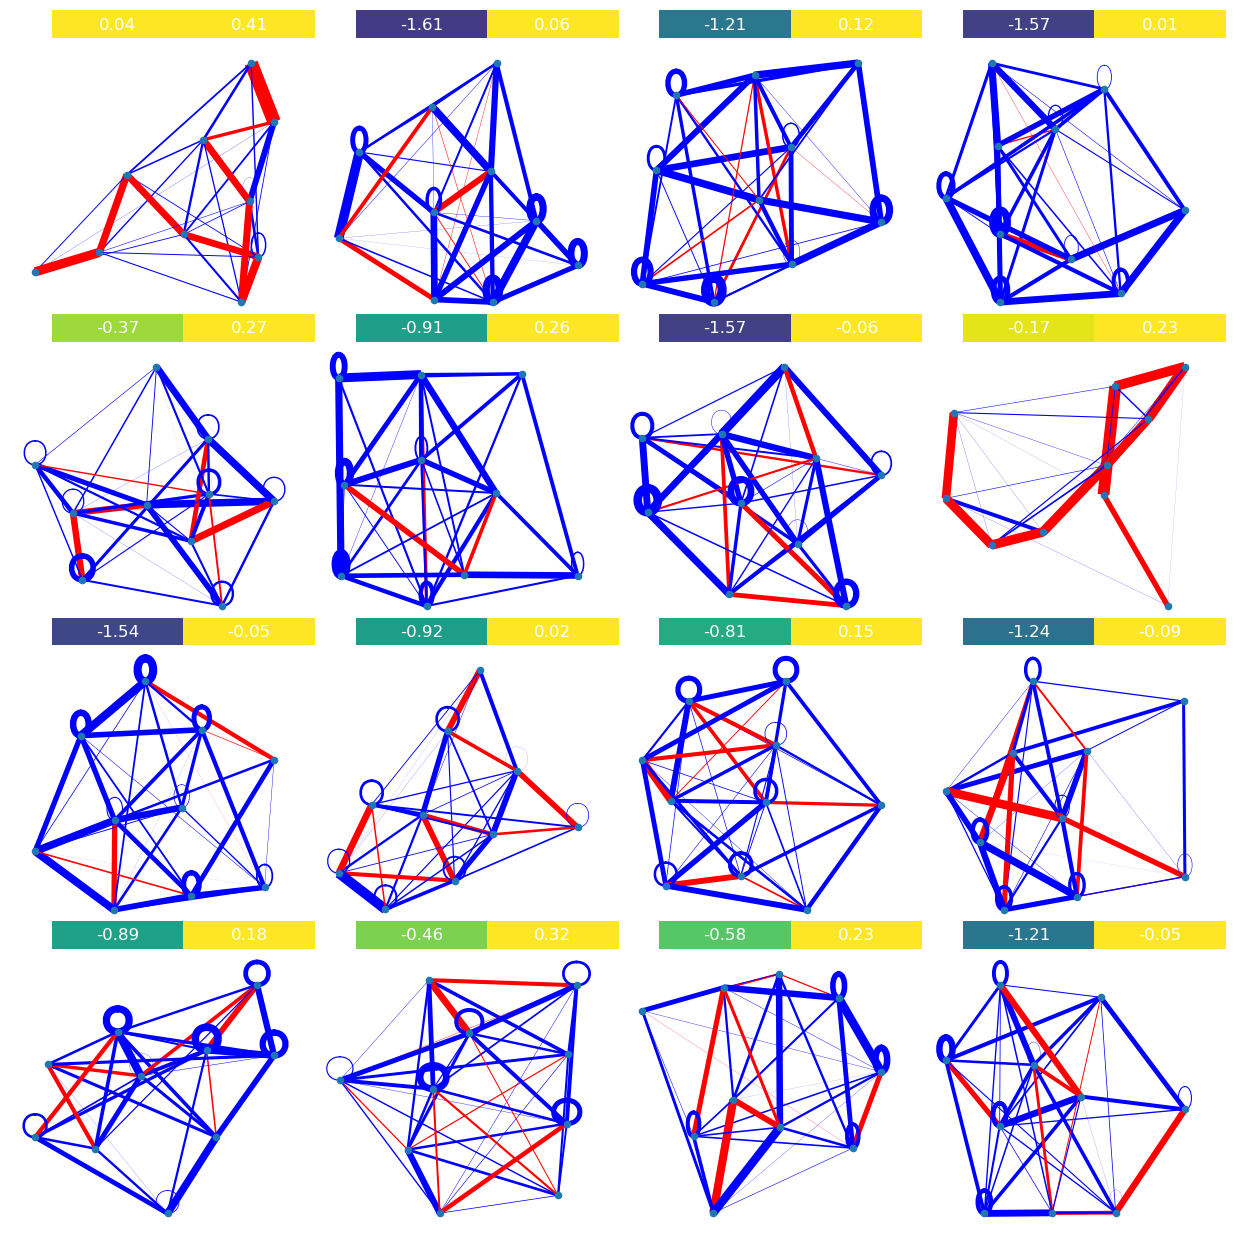

In [30]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'WS_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_WS^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

## Barabasi-Albert (preferential attachment)

### Load BA

In [37]:
def BA(ntwk, m0=1, m=1, n=100, alpha=1, save_path='data/BA_{ntwk}.txt'):
    # Barabasi-Albert model with baseline graph G = single node with m0 self-loops 
    # Each new node has m edges pointing to some nodes in the existing graph 
    # alpha=1 -> preferential attachment: The head of each new directed edge is chosen randomly with probability 
    # proportional to the degree
    # alpha=0 ->: Uniform attachment: The head of each new directed edge is chosen uniformly at random
    # alpha \notin\{0,1} -> nonlinear preferential attachment: The head of each new directed edge is chosen 
    # randomly with probability proportional to the degree^alpha
    
    save_path = save_path.format(ntwk=ntwk)

    G0 = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G0.add_edge(e[0], e[1])

    if G0 is not None: 
        G_ba = G0
    else: 
        G_ba = nx.MultiGraph() # baseline graph with a single node and m0 self-loops 
        for i in np.arange(m0):
            G_ba.add_edge(1,1)
        
    for s in np.arange(1,n):
        for j in np.arange(m):
            # form a degree distribution 
            degrees = np.asarray([G_ba.degree(n)**(alpha) for n in G_ba.nodes()])
            deg_dist = degrees*(1/np.sum(degrees))
            v = np.random.choice(G_ba.nodes(), p=deg_dist)
            G_ba.add_edge(s,v)

    nx.write_edgelist(G_ba, save_path, data=False)

In [38]:
# Example Usage
BA('Caltech36')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 150, 7]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 150
num of subgraphs induced on k-paths: 7
initial loading beta [[-0.82711696  0.70288087  0.38789047 -0.49059439  0.90153947  0.25971237
   0.8934637   0.99634429 -0.86934716  0.44437175  0.44730613  0.60696428
   0.2830097  -0.09640099 -0.43737672  0.61545695 -0.25831361]
 [-0.57165737  0.84896511  0.89987308 -0.77941678 -0.85123813  0.10524754
   0.90339351 -0.67633036 -0.7597743  -0.80280706 -0.92711375  0.24862628
   0.86238856 -0.75863828 -0.84171517 -0.82462008  0.96968733]]


  9%|▉         | 9/100 [00:00<00:01, 82.98it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[327,  30],
       [ 15, 142]], dtype=int64), 0.912]


 18%|█▊        | 18/100 [00:00<00:01, 78.34it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[327,  30],
       [ 15, 142]], dtype=int64), 0.912]


 34%|███▍      | 34/100 [00:00<00:00, 73.62it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  29],
       [ 15, 142]], dtype=int64), 0.914]


 42%|████▏     | 42/100 [00:00<00:00, 71.12it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  29],
       [ 15, 142]], dtype=int64), 0.914]


 50%|█████     | 50/100 [00:00<00:00, 70.29it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  29],
       [ 15, 142]], dtype=int64), 0.914]


 58%|█████▊    | 58/100 [00:00<00:00, 69.21it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  29],
       [ 15, 142]], dtype=int64), 0.914]


 73%|███████▎  | 73/100 [00:01<00:00, 66.68it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  29],
       [ 15, 142]], dtype=int64), 0.914]


 80%|████████  | 80/100 [00:01<00:00, 61.67it/s]

!!! pred_type filter


 88%|████████▊ | 88/100 [00:01<00:00, 63.94it/s]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  29],
       [ 15, 142]], dtype=int64), 0.914]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  29],
       [ 15, 142]], dtype=int64), 0.914]


100%|██████████| 100/100 [00:01<00:00, 68.77it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[328,  29],
       [ 15, 142]], dtype=int64), 0.914]


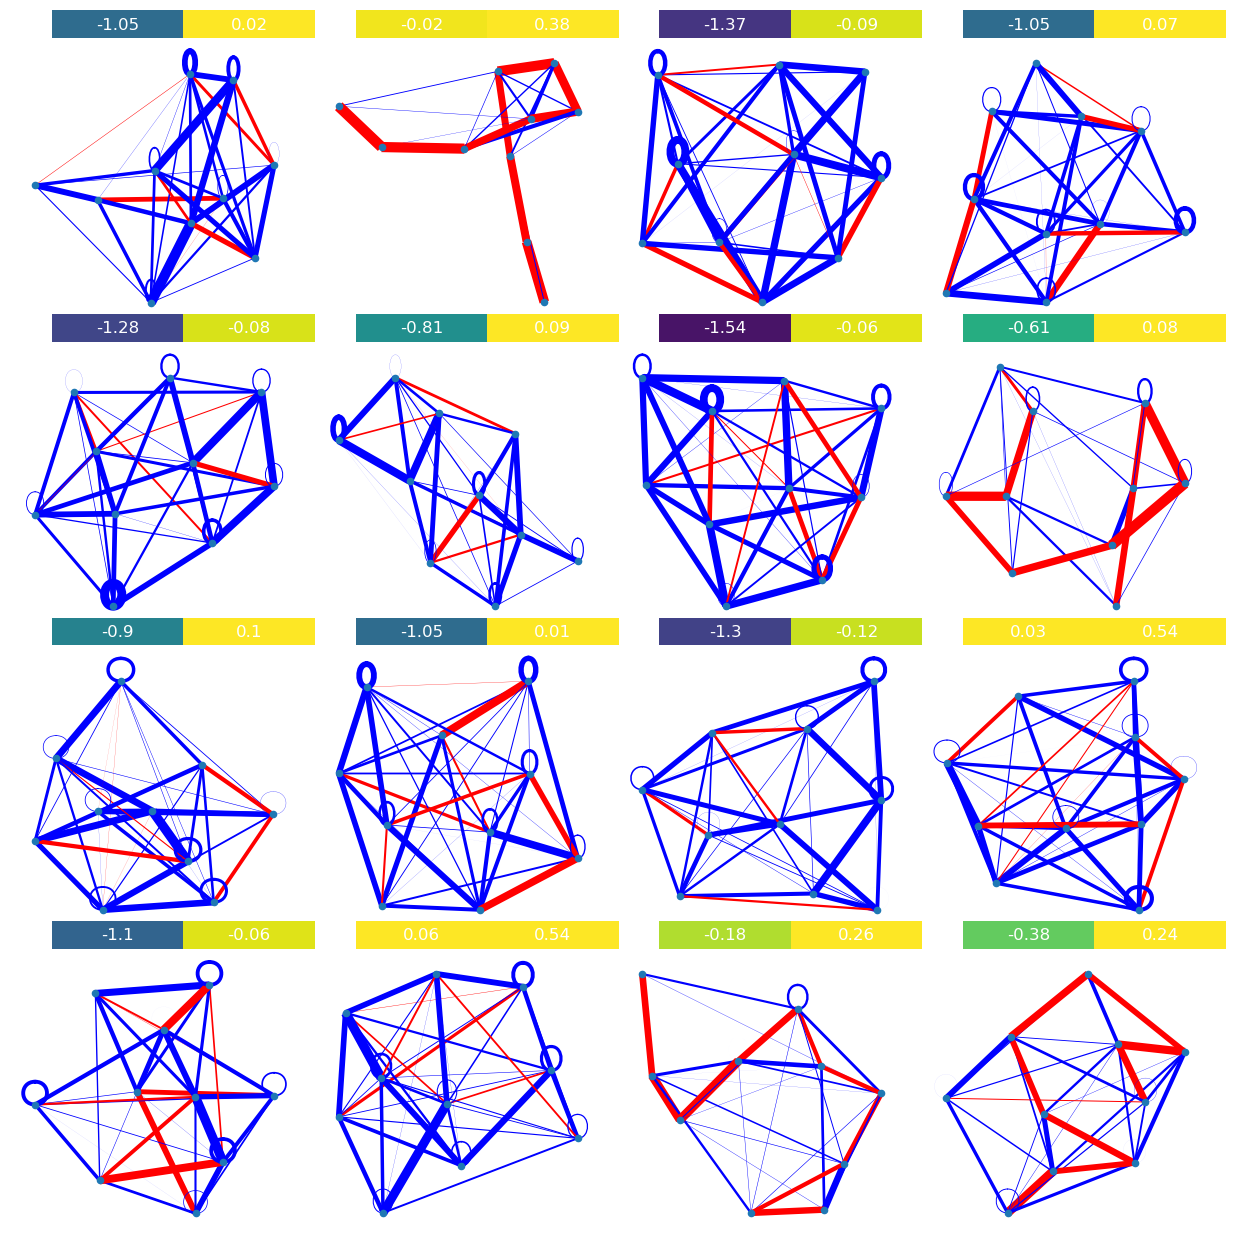

In [33]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'BA_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_BA^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

## Confinguration model

### Load CM

In [41]:
def CM(ntwk, save_path='data/CM_{ntwk}.txt'):
    # Configuration model with degree sequence d = [d1, ... , dn] (a list or array)
    # di \ge 0 and sum to even 
    
    save_path = save_path.format(ntwk=ntwk)

    G0 = nx.Graph()
    path = "data/" + str(ntwk) + '.txt'
    edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))
    for e in edgelist:
        G0.add_edge(e[0], e[1])

    degrees = [G0.degree(v) for v in G0.nodes()]

    d = list(degrees)
    stubs_list = []
    for i in np.arange(len(d)):
        for j in np.arange(d[i]):
            stubs_list.append([i,j])

    G_cm = nx.MultiGraph()
    while len(stubs_list)>0:
        ss = np.random.choice(np.asarray(len(stubs_list)), 2, replace=False)
        s1 = ss[0]
        s2 = ss[1]
        half_edge1 = stubs_list[s1]
        half_edge2 = stubs_list[s2]
        G_cm.add_edge(half_edge1[0], half_edge2[0])
        stubs_list.remove(half_edge1)
        if s1 != s2:
            stubs_list.remove(half_edge2)
                    
    nx.write_edgelist(G_cm, save_path, data=False)

In [42]:
# Example Usage
CM('Caltech36')

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
 !!! The balanced size_list: [100, 146, 7]
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 146
num of subgraphs induced on k-paths: 7
initial loading beta [[-0.69864973 -0.03498636  0.49804157  0.43884285  0.9990496   0.14848985
   0.70056576  0.03588611 -0.05237754 -0.17351536 -0.80116315  0.74618903
   0.84277535  0.79788133  0.68756611 -0.93936764  0.84702794]
 [ 0.16912754 -0.78766564 -0.51616828 -0.9610946   0.20482402  0.14878903
   0.15985806 -0.7800478   0.44516282  0.29161571 -0.77688681  0.15007043
  -0.16300407 -0.76345892 -0.43109837  0.38222984 -0.21027688]]


  8%|▊         | 8/100 [00:00<00:01, 78.71it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[330,  23],
       [ 14, 139]], dtype=int64), 0.927]


 25%|██▌       | 25/100 [00:00<00:01, 72.88it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  24],
       [ 14, 139]], dtype=int64), 0.925]


 33%|███▎      | 33/100 [00:00<00:00, 67.67it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  24],
       [ 13, 140]], dtype=int64), 0.927]


 40%|████      | 40/100 [00:00<00:00, 65.10it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  24],
       [ 13, 140]], dtype=int64), 0.927]


 47%|████▋     | 47/100 [00:00<00:00, 60.73it/s]

!!! pred_type filter


 61%|██████    | 61/100 [00:00<00:00, 62.55it/s]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  25],
       [ 12, 141]], dtype=int64), 0.927]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[328,  25],
       [ 12, 141]], dtype=int64), 0.927]


 75%|███████▌  | 75/100 [00:01<00:00, 55.69it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  24],
       [ 12, 141]], dtype=int64), 0.929]


 90%|█████████ | 90/100 [00:01<00:00, 59.58it/s]

!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  24],
       [ 12, 141]], dtype=int64), 0.929]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[329,  24],
       [ 12, 141]], dtype=int64), 0.929]


100%|██████████| 100/100 [00:01<00:00, 63.15it/s]


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[329,  24],
       [ 12, 141]], dtype=int64), 0.929]


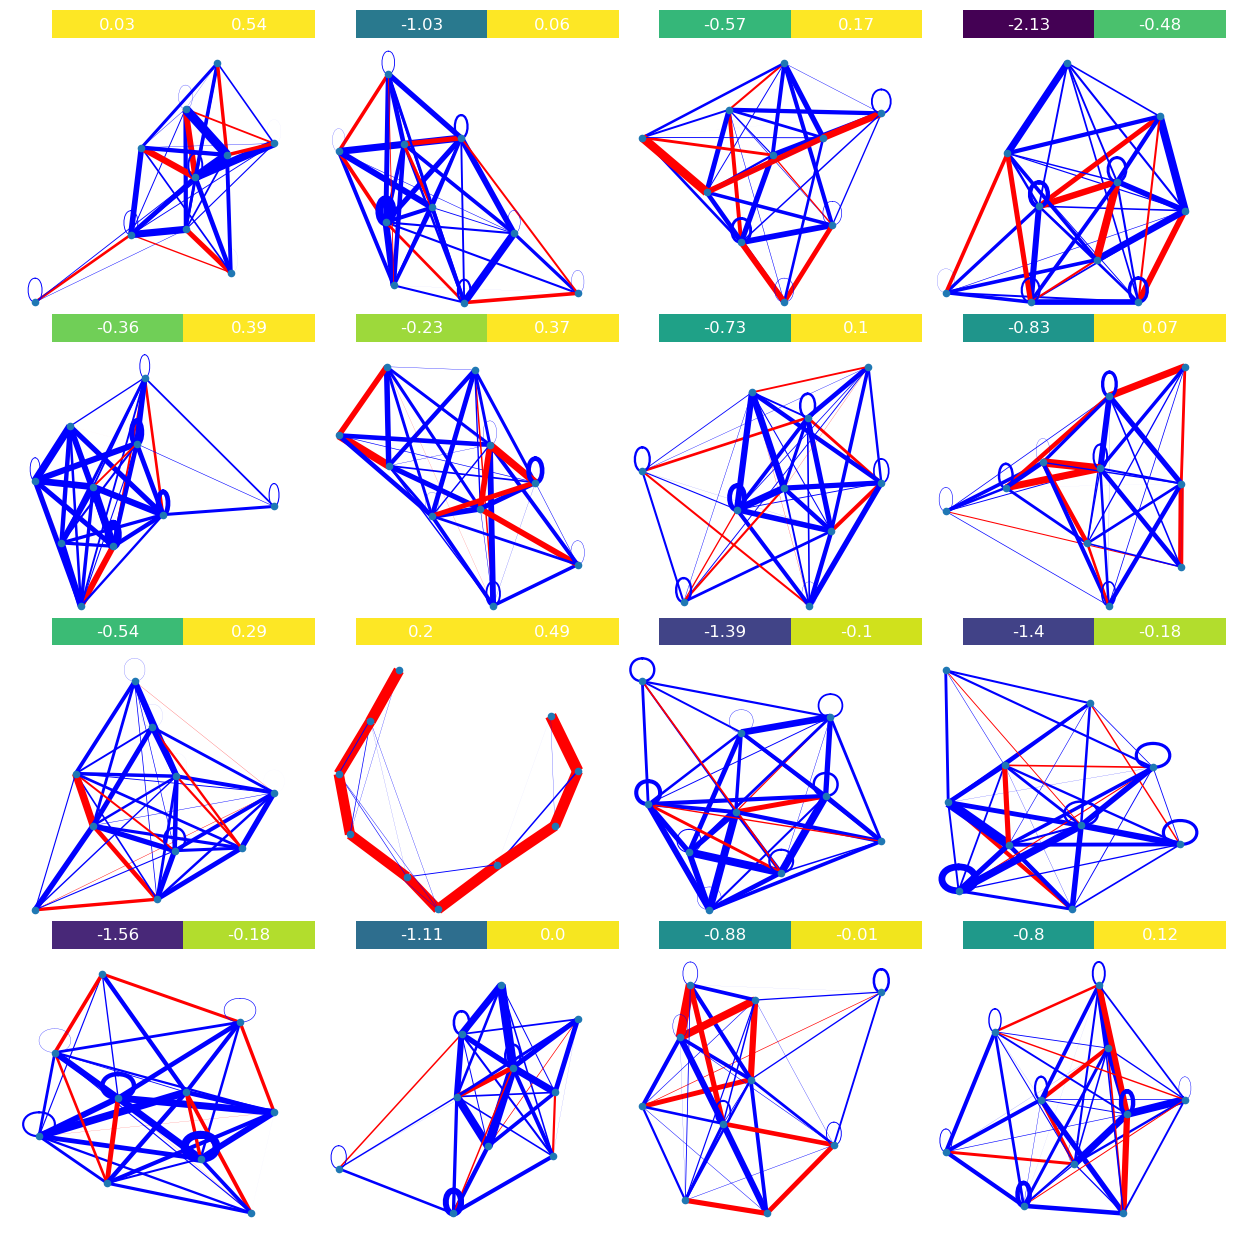

In [36]:
# Visualize dictionaries
ntwk_list = ['Caltech36', 'UCLA26', 'CM_Caltech36']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

W, beta, H = sndl_equalEdge(graph_list, base_sample_size=100, k=10, xi=5, n_components=16, iter = 100, subsample_number=100,
                            if_validate=True, if_compute_recons_error=False)

display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_CM^Caltech36', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)